In [1]:
from keras.layers import Dense
from keras import backend
import numpy as np

Using TensorFlow backend.


In [50]:
a = np.array([[[1,2,-3], [4,5,6]]])
b = np.array([[[1,2,-3], [4,5,6]]])
print(a.shape)
print(b.shape)
c=backend.concatenate([a, b], axis=2)
print(c.shape)
print(np.concatenate([a,b], axis=2))

(1, 2, 3)
(1, 2, 3)
(1, 2, 6)
[[[ 1  2 -3  1  2 -3]
  [ 4  5  6  4  5  6]]]


In [27]:
b = backend.tile(a, (9, 2))

In [32]:
c = backend.reshape(a, (1,1,6))
c = backend.tile(c, (2,3,7))

In [33]:
print(c.shape)


(2, 3, 42)


In [36]:
print("testing")
print(b.shape)

testing
(18, 6)


In [70]:
d = np.array([[[0],[-1],[2]], [[0], [-1],[8]]])
print(d.shape)
d = np.reshape(d,(2,1,3))
print(d.shape)
print(d)
e = np.stack((d,d), axis=2)
print(e.shape)
print(e)

(2, 3, 1)
(2, 1, 3)
[[[ 0 -1  2]]

 [[ 0 -1  8]]]
(2, 1, 2, 3)
[[[[ 0 -1  2]
   [ 0 -1  2]]]


 [[[ 0 -1  8]
   [ 0 -1  8]]]]


In [54]:
bn = backend.random_binomial((2,), [0.1,0.9])
print(bn.shape)
print(bn)
backend.sigmoid(0.1)

(2,)
Tensor("Select_2:0", shape=(2,), dtype=float32)


<tf.Tensor 'Sigmoid:0' shape=() dtype=float32>

In [74]:
a = np.array([[1,2,3],[0,-4,5]])
b = np.array([[-1,0,1],[0,7,-1]])
c = (lambda x, y: np.concatenate([x,y], axis=0))(a,b)
print(c.shape)
print(c)

(4, 3)
[[ 1  2  3]
 [ 0 -4  5]
 [-1  0  1]
 [ 0  7 -1]]


In [89]:
a = np.linspace(-1,1,10)
b = a ** 2
r = np.stack((a, b), axis=1)
C = np.dot(r.T, r)
D = np.dot(r, r.T)
print(C)
#print(D)
print(np.sum(a))
print(np.sum(b))
print(np.var(a))
print(np.var(b))

[[  4.07407407e+00  -4.44089210e-16]
 [ -4.44089210e-16   2.94741655e+00]]
-2.22044604925e-16
4.07407407407
0.407407407407
0.128760859625


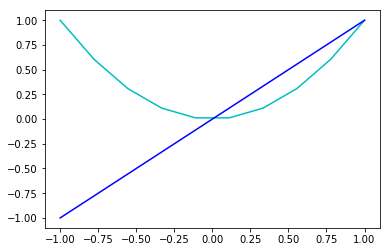

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(a, b, color='c')
plt.plot(a, a, color='b')

In [91]:
def rvs(dim=3):
     random_state = np.random
     H = np.eye(dim)
     D = np.ones((dim,))
     for n in range(1, dim):
         x = random_state.normal(size=(dim-n+1,))
         D[n-1] = np.sign(x[0])
         x[0] -= D[n-1]*np.sqrt((x*x).sum())
         # Householder transformation
         Hx = (np.eye(dim-n+1) - 2.*np.outer(x, x)/(x*x).sum())
         mat = np.eye(dim)
         mat[n-1:, n-1:] = Hx
         H = np.dot(H, mat)
         # Fix the last sign such that the determinant is 1
     D[-1] = (-1)**(1-(dim % 2))*D.prod()
     # Equivalent to np.dot(np.diag(D), H) but faster, apparently
     H = (D*H.T).T
     return H

In [97]:
np.random.seed(7)
A=rvs()
print(A)
print(np.dot(A.T,A))

[[ 0.96388439 -0.1385483   0.22744507]
 [-0.26566278 -0.56021064  0.78459373]
 [ 0.01871302 -0.81668134 -0.57678541]]
[[  1.00000000e+00   2.18067375e-17  -3.28161282e-17]
 [  2.18067375e-17   1.00000000e+00  -1.08949919e-16]
 [ -3.28161282e-17  -1.08949919e-16   1.00000000e+00]]


In [100]:
from scipy.stats import norm
v1 = norm.rvs(size=5)
print(np.dot(v1,v1))
v2 = norm.rvs(size=5)
print(np.dot(v2,v2))
print(np.dot(v1,v2))


4.84042180016
7.01770023245
-1.73505105308


In [36]:
np.random.seed(7)
from scipy.stats import ortho_group 
r = ortho_group.rvs(dim=5)
print(r)
print(r[:10,])


[[ 0.85995147 -0.38090765 -0.26011664 -0.15926733 -0.14955297]
 [-0.23701712  0.04752149 -0.48130625 -0.8134627   0.2195161 ]
 [ 0.01669525 -0.00298015  0.67730392 -0.54041815 -0.49891884]
 [ 0.20729896  0.82259455 -0.29203662  0.04179172 -0.43969695]
 [-0.4013163  -0.41950017 -0.39580001  0.13825347 -0.69799224]]
[[ 0.85995147 -0.38090765 -0.26011664 -0.15926733 -0.14955297]
 [-0.23701712  0.04752149 -0.48130625 -0.8134627   0.2195161 ]
 [ 0.01669525 -0.00298015  0.67730392 -0.54041815 -0.49891884]
 [ 0.20729896  0.82259455 -0.29203662  0.04179172 -0.43969695]
 [-0.4013163  -0.41950017 -0.39580001  0.13825347 -0.69799224]]


In [141]:
import pandas as pd
hf = pd.HDFStore('SYNTHETIC_DATA/simulation.h5', mode='r')
print(hf.keys())
df = pd.read_hdf('SYNTHETIC_DATA/simulation.h5', mode='r', key='/trn_data_100x10000__x_nm')

['/trn_data_100x10000__o_k', '/trn_data_100x10000__pi_nm', '/trn_data_100x10000__x_nm', '/trn_data_100x10000__y_n', '/trn_data_100x1000__o_k', '/trn_data_100x1000__pi_nm', '/trn_data_100x1000__x_nm', '/trn_data_100x1000__y_n', '/tst_data_100x10000__o_k', '/tst_data_100x10000__pi_nm', '/tst_data_100x10000__x_nm', '/tst_data_100x10000__y_n', '/tst_data_100x1000__o_k', '/tst_data_100x1000__pi_nm', '/tst_data_100x1000__x_nm', '/tst_data_100x1000__y_n', '/val_data_100x10000__o_k', '/val_data_100x10000__pi_nm', '/val_data_100x10000__x_nm', '/val_data_100x10000__y_n', '/val_data_100x1000__o_k', '/val_data_100x1000__pi_nm', '/val_data_100x1000__x_nm', '/val_data_100x1000__y_n']


In [142]:

df.tail()

,SNPS_1,SNPS_2,SNPS_3,SNPS_4,SNPS_5,SNPS_6,SNPS_7,SNPS_8,SNPS_9,SNPS_10,...,SNPS_9991,SNPS_9992,SNPS_9993,SNPS_9994,SNPS_9995,SNPS_9996,SNPS_9997,SNPS_9998,SNPS_9999,SNPS_10000
IND_96,0,0,0,1,2,0,0,1,2,0,...,1,2,0,1,2,1,1,2,1,0
IND_97,1,1,0,0,1,0,0,1,1,2,...,2,0,0,1,1,2,0,1,1,0
IND_98,1,0,0,1,1,0,1,1,2,1,...,0,0,1,1,1,1,0,2,0,0
IND_99,2,1,0,2,2,0,2,2,0,0,...,2,2,1,0,0,1,1,2,0,1
IND_100,2,0,2,0,0,0,0,1,0,0,...,1,1,1,2,2,0,0,2,1,2


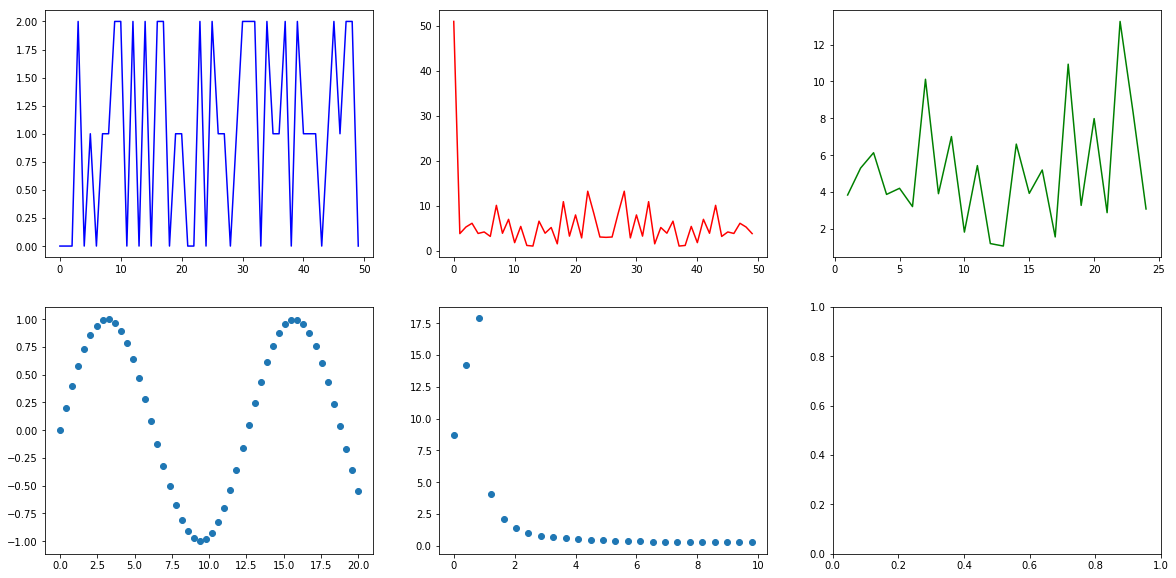

In [235]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.fftpack import fft

fig, ax = plt.subplots(2, 3, figsize=(20,10))

y = df.iloc[0,:50]
#print(y.shape)
x = np.arange(y.shape[0])
ax[0,0].plot(x, y, color='b')

yf = fft(y)
ax[0,1].plot(x, np.absolute(yf), color='r')

fr = np.fft.fft(y)
#fr.sort()
ax[0,2].plot(x[1:int(len(fr)/2)],np.absolute(fr[1:int(len(fr)/2)]), color='g')
#print(fr)
#print(np.absolute(yf[:5]) )

sx = np.linspace(0, 20)
sy = np.sin(sx/2.)
ax[1,0].scatter(sx, sy)

fr = np.fft.fft(sy)
#fr.sort()
ax[1,1].scatter(sx[0:int(len(sx)/2)], np.absolute(fr[0:int(len(fr)/2)]))

In [68]:
u,d,v = np.linalg.svd(df, full_matrices=False)

In [239]:
dd = np.load('store_metrics.npy')
u = dd.item()
for k, v in u.items():
    c, d = 0, 0
    for a, b in v:
        if b > c:
            c = b
            d = a
    print(k,c)

No Reg 0.466986794718
L1+.02 0.46218487395
L1+.9 0.52981192477
L2 .02 0.537014805922
L1 100 0.539415766307
PCA 0.549819927971
PCA L1 .9 0.584233693477
PCA L1 10 0.543217286915
PCA L1 100 0.532412965186
PCA L1 1000 0.485194077631
PCA L1 10000 0.512004801921
PCA L1 100000 0.534213685474


In [82]:
print(u.shape, len(d),v.shape)
print(max(d)/min(d),max(d),min(d))
print(np.max(u[:,0]),np.min(u[:,0]))
r = [ np.max(u[:,i]) - np.min(u[:,i]) for i in range(u.shape[1])]
print(np.max(r), np.min(r))
print(np.argmax(r), np.argmin(r))
print(r[0],r[99])
print(v[0].shape)

(100, 100) 100 (100, 10000)
13.5512023372 1001.62542719 73.9141370831
-0.098340992976 -0.101709748982
0.645217739206 0.00336875600624
9 0
0.00336875600624 0.458992558116
(10000,)


In [140]:
tx, ty, vx, vy = [0]*4
print(tx)
def simple_logistic(**kargs):
    tx = kargs['tx']
    ty = kargs['tx']
    vx = kargs['vx']
    vy = kargs['vy']
    print('Hello {}'.format(tx))
    pass

def logistic_with_l1(**kargs):
    print('World! {}'.format(vx))
    pass

ss = {'No Reg' : simple_logistic,
      'L1+.02' : logistic_with_l1,
     }
margs = {'tx': tx, 'ty': ty, 'vx': vx, 'vy': vy, 'reg': 0.02}
for k in ss.keys():
    f = ss[k]
    f(**margs)

0
Hello 0
World! 0


In [22]:
trainz = pd.read_hdf('SNPS_TRAITS_data/small.h5', mode='r', key='/z_0').values
trainw = pd.read_hdf('SNPS_TRAITS_data/small.h5', mode='r', key='/w_0').values
trainl = pd.read_hdf('SNPS_TRAITS_data/small.h5', mode='r', key='/logits_0').values

import numpy as np
U, s, V = np.linalg.svd(trainl, full_matrices=False)
print(U.shape)
print(trainz.shape)

print(s.shape)

print(V.shape)
print(trainw.shape)

print(U[:,1])
print(trainz[:,1])


(10, 10)
(10, 25)
(10,)
(10, 1001)
(1000, 25)
[ 0.09202647 -0.17707714  0.41441199 -0.01695689  0.21579577  0.23612476
  0.75473863  0.23514943  0.23945098 -0.05970625]
[-1.53902044  1.24818277  0.59721915 -0.09892539 -0.23575977  1.00460823
  1.44393838 -0.77543357  1.75157039  0.00681374]


In [20]:
import numpy as np
s = [-1] + [ x for x in df.shape ]
print(s)
a = np.reshape(df.values, (s))
a.shape

[-1, 33, 100]


(1, 33, 100)

In [56]:
from scipy.stats import binom
binom.rvs(1, np.random.random(10))

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [55]:
import numpy as np
np.random.seed(4099777)

#a = np.random.random([5])
a = np.array([ 0.334, 0.334, 0.663,  0.336,  0.333])
print(a)
from keras import backend
from scipy.stats import binom

x = []
for i in range(10000):
    x += binom.rvs(2,a).tolist(),
print(x[0], x[1])
x = np.asarray(x, int)
#print(x)

#
# https://stackoverflow.com/questions/12297016/how-to-find-most-frequent-values-in-numpy-ndarray?rq=1
#
def most_frequent(x):
    u , indices = np.unique(x, return_inverse=True)
    axis = 0
    return u[np.argmax(
                    np.apply_along_axis(np.bincount, 
                            axis,
                            indices.reshape(x.shape), 
                            None, 
                            np.max(indices)+1
                        ),
                axis=axis)]
most_frequent(x)

#counts = np.bincount()
#print np.argmax(counts)


[ 0.334  0.334  0.663  0.336  0.333]
[1, 1, 1, 1, 0] [0, 0, 0, 1, 0]


array([0, 1, 1, 0, 0])

In [36]:
def logits(pi_nm):
    return np.log(pi_nm/(1. - pi_nm))

probs = np.random.random([3,4])
print(probs)
print(logits(probs))

[[ 0.9905355   0.18878795  0.32921926  0.68429418]
 [ 0.67517361  0.30325753  0.05943099  0.78336045]
 [ 0.40491054  0.49021441  0.93073081  0.74001344]]
[[ 4.65069804 -1.45790507 -0.71171832  0.77357709]
 [ 0.73167901 -0.83183346 -2.76166925  1.285358  ]
 [-0.38504558 -0.03914737  2.59796982  1.04603844]]


In [47]:
from keras.utils import to_categorical
def create_non_gwas(N, D1, D2, D3):
    def create_contns_data(N, D1):
        return np.random.randn(N, D1)

    NUM_DISCRETE = 3
    def create_discrete_data(N, D2):
        return binom.rvs(NUM_DISCRETE, np.random.random([N, D2]))

#     NUM_CATEGORIES = 2
#     def create_categorical_data(N, D3):
#         for _ in range(D3):

    return np.concatenate((create_contns_data(N,D1), create_discrete_data(N, D2)), axis=1)

print(create_non_gwas(5,1,2,1))

[[-0.07767854  1.          3.        ]
 [-0.00666164  0.          3.        ]
 [-1.89822223  1.          3.        ]
 [-0.13734993  3.          1.        ]
 [-0.04440839  1.          3.        ]]


In [51]:
x = create_non_gwas(5,1,2,1)
len(x.shape)

2

In [24]:
import numpy as np
a = np.arange(12).reshape(2,2,3)
print(a)
c = np.random.randn(3,2)
print(c)
c.reshape(-1, (2,3))

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
[[-0.63772373  0.91705482]
 [ 0.89976195  1.11016744]
 [ 0.58771011  1.57871577]]


TypeError: 'tuple' object cannot be interpreted as an integer

In [121]:
a =

[[[0]
  [1]
  [2]
  [3]
  [4]]

 [[0]
  [1]
  [2]
  [3]
  [4]]

 [[0]
  [1]
  [2]
  [3]
  [4]]]
